In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import datetime

In [6]:
df = pd.read_csv('/Users/victoroliveira/Desktop/vonix-py-statistic/src/vonixstatisc/data/pandas_data/data_fluency_queue_90.csv')
df

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,day,month,hour,minute,timestamp,handling_time
0,1000,equipez4,OUT,66000.0,3,0,7,0,1,1.0,4,23,February,20,2,1677185676,78
1,1000,equipez4,AUTO,91.0,5,1,0,1,1,3.0,4,23,February,21,2,1677186767,3
2,1000,equipez4,AUTO,89.0,5,1,0,1,1,67.0,4,23,February,21,2,1677186806,5
3,1000,equipez4,AUTO,48.0,4,14,0,2,1,1.0,4,23,February,21,2,1677186806,2
4,1000,equipez4,AUTO,31.0,5,2,0,1,1,3.0,4,23,February,21,2,1677186824,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117583,1573,isnrecuperacao,OUT,11.0,5,0,15,0,1,1.0,1,24,April,21,4,1682370146,47
117584,1137,isjaguars,OUT,21.0,5,0,15,0,1,3.0,1,24,April,21,4,1682370156,70
117585,1572,isnxsell,OUT,11.0,5,0,40,0,1,3.0,1,24,April,21,4,1682370164,2
117586,1600,mgmsales,OUT,89.0,5,0,16,0,1,5.0,1,24,April,21,4,1682370171,4


In [7]:
df_march = df.loc[df['month']== 'March']

In [8]:
df_march_90 = df_march.loc[(df_march['handling_time'] > 10) & (df_march['handling_time'] <180) ]

In [9]:
df_march_90_queue = df_march_90.loc[(df_march_90['queue_id']) == 'equipez6']
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   print(df_march_90_queue)
df_march_90_queue

,agent_id,queue_id,direction,locality_id,call_type_id,hold_secs,ring_secs,initial_position,trunking_id,carrier_id,week_day,day,month,hour,minute,timestamp,handling_time
9338,1124,equipez6,AUTO,94.0,5,1,0,1,1,3.0,3,1,March,12,3,1677674578,13
9339,1120,equipez6,AUTO,NaN,5,1,0,1,1,0.0,3,1,March,12,3,1677674619,28
9340,1140,equipez6,AUTO,17.0,5,2,0,1,1,1.0,3,1,March,12,3,1677674619,50
9341,1124,equipez6,AUTO,19.0,5,2,0,1,1,5.0,3,1,March,12,3,1677674671,104
9343,1120,equipez6,AUTO,21.0,5,1,0,1,1,3.0,3,1,March,12,3,1677674700,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18659,1123,equipez6,OUT,47.0,4,0,12,0,1,3.0,1,6,March,20,3,1678134571,80
18668,1123,equipez6,OUT,31.0,5,0,16,0,1,5.0,1,6,March,20,3,1678134828,70
18910,1123,equipez6,OUT,61.0,5,0,4,0,1,5.0,1,6,March,22,3,1678140543,25
18939,1123,equipez6,OUT,11.0,5,0,8,0,1,3.0,1,6,March,22,3,1678141260,14


In [36]:

dict_90_queue_day_1 = df_march_90_queue.set_index('timestamp').to_dict()['handling_time']


In [37]:
from datetime import datetime
from time import gmtime, strftime
import time
def transform_dict(data: dict, period: int) -> dict:
    """method that receives dict from database query
    {start_at(timestamp): talk_secs(seconds), ...} and create
    another dict based on the period (15, 30, 1hr) chosen
    {last_timestamp: [12,24,56,12, 90, 100], last_timestamp - period:[195,235,201,300], ... interval of three minutes for standard model}
    For standard model the data from the last period( 15 min, 30 min, 1h) is used to construct forecast for the next period so the return_dict begins with the last timestamp to the first
    """
    seconds = period * 60
    
    return_dict = {}

    keys_array = list(data.keys())
    beginning = keys_array[0]
    limit= beginning + seconds
    end = keys_array[-1]
    arr = []
    break_v = 1
    while beginning < end:
        if break_v == beginning:
            break
        break_v = beginning
        for key, value in data.items():
            if key <= limit:
                arr.append(value)
                continue
        
            return_dict[f"{beginning}"] = arr
            arr = []
            arr.append(value)
            beginning = key
            limit = beginning + seconds
            

    return return_dict
#datetime.fromtimestamp(end).strftime('%d/%m %H:%M')

In [38]:
dict_90_queue_day_1_tr= transform_dict(dict_90_queue_day_1, 15)

#df = pd.DataFrame()
#df['timestamp'] = dict_90_queue_day_1_tr.keys()
#df['times'] = dict_90_queue_day_1_tr.values()
#df['day'] = [datetime.fromtimestamp(int(i)+4*3600).strftime('%d') for i in dict_90_queue_day_1_tr.keys()]
#df['hour'] = [datetime.fromtimestamp(int(i)+4*3600).strftime('%H') for i in dict_90_queue_day_1_tr.keys()]
#df['minute'] = [datetime.fromtimestamp(int(i)+4*3600).strftime('%-M') for i in dict_90_queue_day_1_tr.keys()]
#df['week_day'] = [datetime.fromtimestamp(int(i)).strftime('%A') for i in dict_90_15_tr_clean_mean.keys()]
#pd.set_option('display.max_rows', None)
#df

In [39]:
def z_clean_outliers(time_array: list) -> list:
    """method to clean outliers of dict
    { 90: [12,24,56,12], 180: [165,235,12,9], ... interval of three minutes}
    for standard model based on z-score method"""

    threshold = 2
    arr = []
    mean = np.mean(time_array)
    std = np.std(time_array)
    for h_time in time_array:
        if h_time - mean == 0:
           arr.append(h_time)
           continue
        
        z_score = (h_time - mean) / std
        #print({'z_score':z_score, 'h_time':h_time})
        if np.abs(z_score) < threshold:
           arr.append(h_time)  
            
    return arr

In [40]:
dict_90_queue_day_1_tr_clean = {i:z_clean_outliers(dict_90_queue_day_1_tr[i]) for i in dict_90_queue_day_1_tr.keys() }

In [41]:
dict_march_90_15_tr_clean_mean = {i:round(np.mean(dict_90_queue_day_1_tr_clean[i]), 1) for i in dict_90_queue_day_1_tr_clean.keys()}

In [70]:
dict_march_90_15_tr_clean_mean

{'1677674578': 36.8,
 '1677675482': 51.7,
 '1677676601': 47.4,
 '1677678561': 64.6,
 '1677680040': 43.5,
 '1677680945': 45.4,
 '1677681849': 43.3,
 '1677682780': 48.8,
 '1677683701': 42.6,
 '1677684618': 52.7,
 '1677685522': 56.8,
 '1677686427': 45.0,
 '1677687421': 40.5,
 '1677688342': 43.1,
 '1677689260': 45.5,
 '1677690773': 47.1,
 '1677691725': 43.7,
 '1677692709': 50.0,
 '1677693630': 47.0,
 '1677694560': 42.3,
 '1677695479': 42.5,
 '1677696406': 50.4,
 '1677697312': 43.9,
 '1677698215': 46.5,
 '1677699138': 46.7,
 '1677700091': 43.0,
 '1677701028': 42.5,
 '1677701941': 49.2,
 '1677702866': 48.0,
 '1677703819': 48.2,
 '1677704759': 44.0,
 '1677705695': 50.8,
 '1677706648': 54.8,
 '1677711158': 25.5,
 '1677763010': 67.8,
 '1677764115': 57.0,
 '1677765116': 35.2,
 '1677767191': 46.7,
 '1677768093': 50.3,
 '1677769036': 46.6,
 '1677770082': 44.4,
 '1677771019': 43.5,
 '1677776020': 48.2,
 '1677777139': 44.0,
 '1677778042': 55.6,
 '1677778946': 37.8,
 '1677779851': 45.3,
 '1677780753'

In [ ]:
df = pd.DataFrame()

In [54]:
df['timestamp'] = dict_march_90_15_tr_clean_mean.keys()
df['mean'] = dict_march_90_15_tr_clean_mean.values()
df['day'] = [datetime.fromtimestamp(int(i)).strftime('%d') for i in dict_march_90_15_tr_clean_mean.keys()]
df['hour'] = [datetime.fromtimestamp(int(i)).strftime('%H') for i in dict_march_90_15_tr_clean_mean.keys()]
df['minute'] = [datetime.fromtimestamp(int(i)).strftime('%M') for i in dict_march_90_15_tr_clean_mean.keys()]
df['week_day'] = [datetime.fromtimestamp(int(i)).strftime('%A') for i in dict_march_90_15_tr_clean_mean.keys()]
df

,timestamp,mean,day,hour,minute,week_day
0,1677674578,36.8,01,08,42,Wednesday
1,1677675482,51.7,01,08,58,Wednesday
2,1677676601,47.4,01,09,16,Wednesday
3,1677678561,64.6,01,09,49,Wednesday
4,1677680040,43.5,01,10,14,Wednesday
...,...,...,...,...,...,...
101,1678111013,18.5,06,09,56,Monday
102,1678127068,19.0,06,14,24,Monday
103,1678133547,59.3,06,16,12,Monday
104,1678134571,75.0,06,16,29,Monday


In [68]:
df_1 = df.loc[df['day'] == '01']
df_2 = df.loc[df['day'] == '02']
df_3 = df.loc[df['day'] == '03']
df_5 = df.loc[df['day'] == '05']
df_6 = df.loc[df['day'] == '06']
df_7 = df.loc[df['day'] == '07']

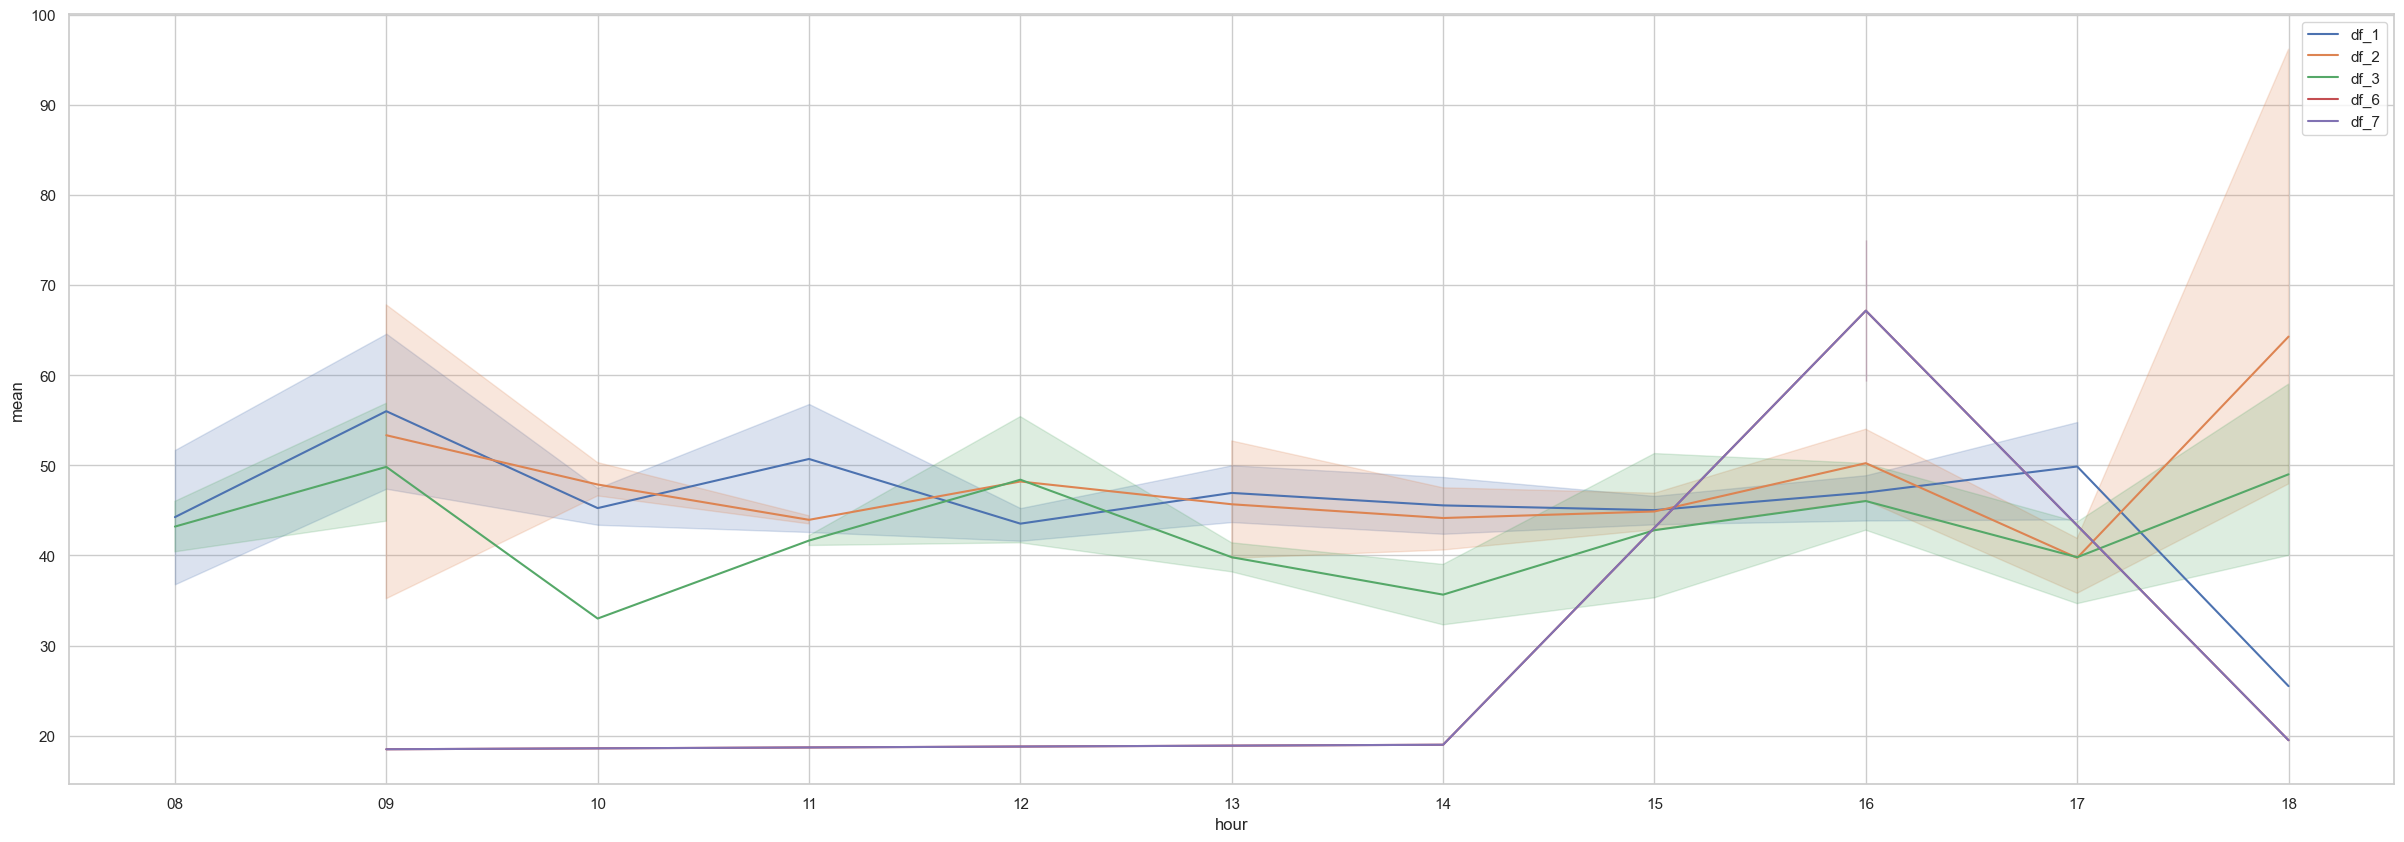

In [69]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,10)) 
sns.lineplot(df_1, x="hour", y = "mean", label = 'df_1')
sns.lineplot(df_2, x="hour", y = "mean", label = 'df_2')
sns.lineplot(df_3, x="hour", y = "mean", label = 'df_3')
sns.lineplot(df_5, x="hour", y = "mean", label = 'df_5')
sns.lineplot(df_6, x="hour", y = "mean", label = 'df_6')
sns.lineplot(df_7, x="hour", y = "mean", label = 'df_7')

plt.show()

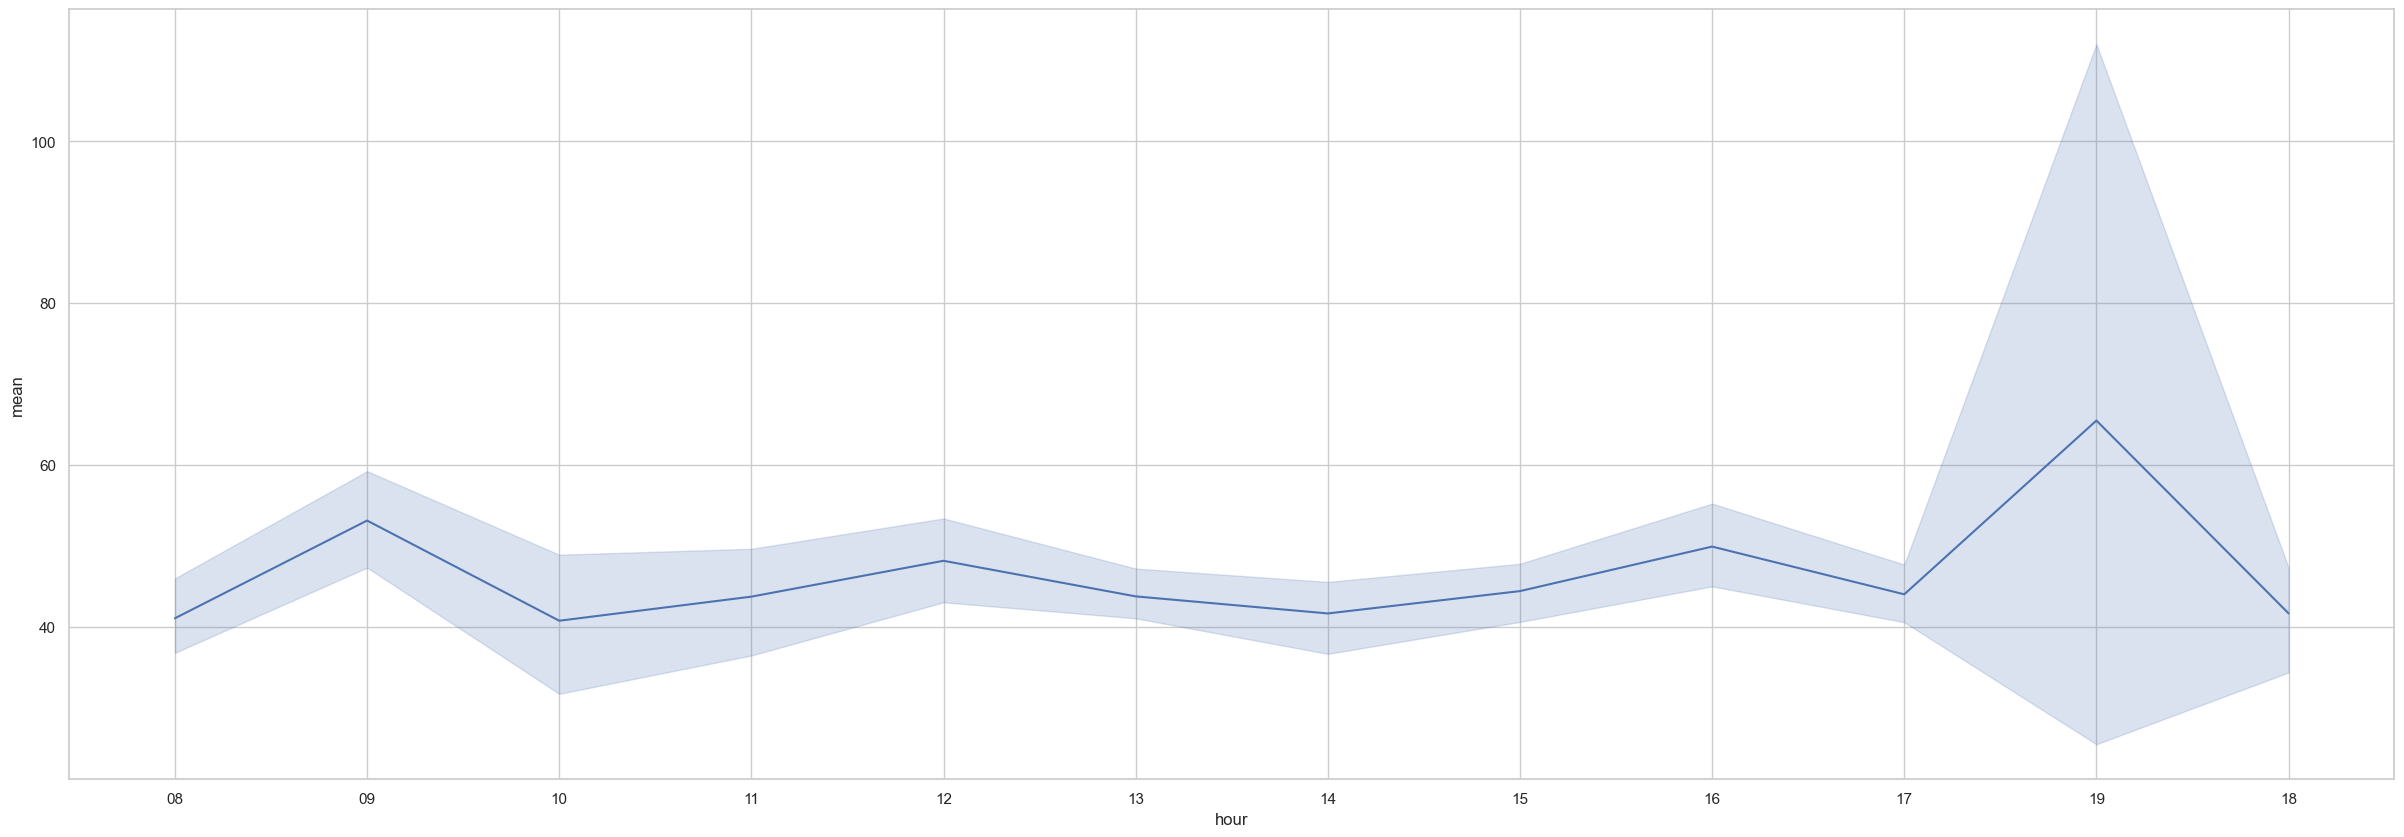

In [303]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,10)) 
sns.lineplot(df, x="hour", y = "mean")
plt.show()

In [240]:
df_day_01 = df.loc[df['day'] == '01']
df_day_02 = df.loc[df['day'] == '02']
df_day_03 = df.loc[df['day'] == '03']
df_day_04 = df.loc[df['day'] == '04']

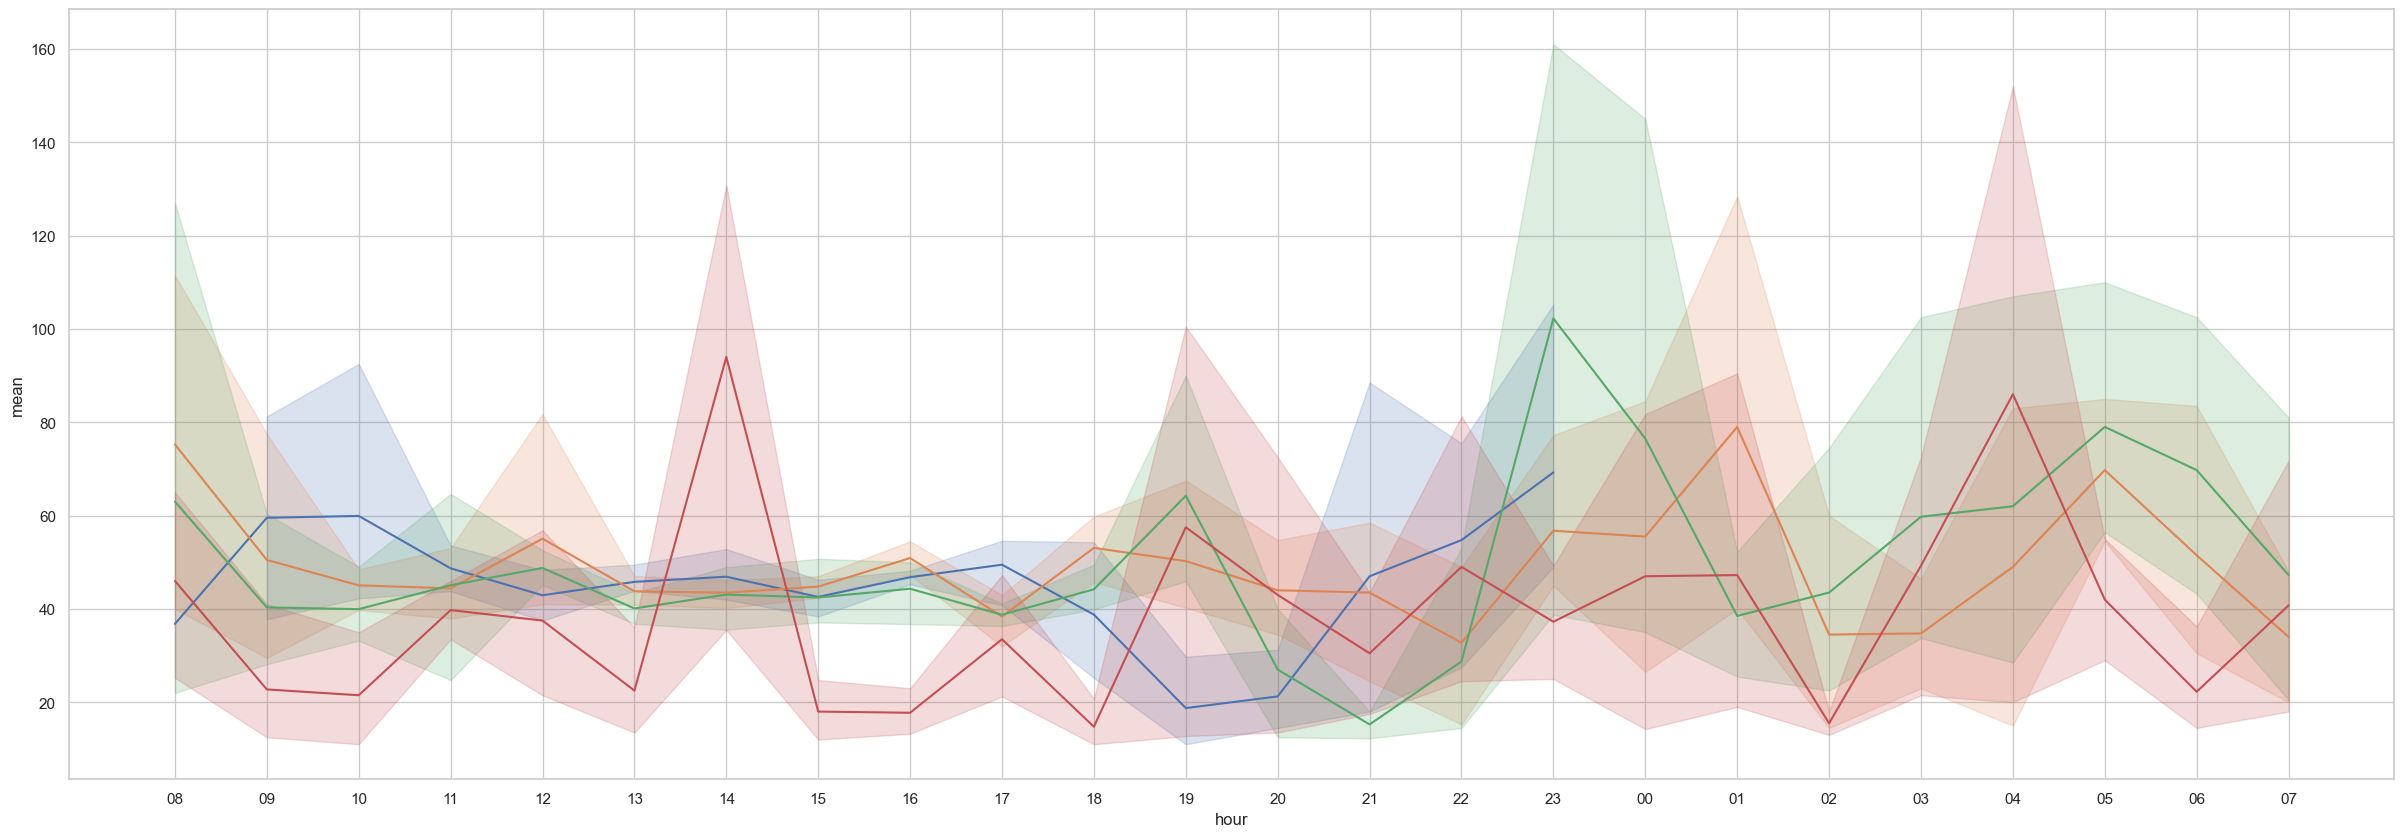

In [236]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,10)) 
sns.lineplot(df_day_01, x="hour", y = "mean")
sns.lineplot(df_day_02, x="hour", y = "mean")
sns.lineplot(df_day_03, x="hour", y = "mean")
sns.lineplot(df_day_04, x="hour", y = "mean")
plt.show()

In [252]:
df_day_monday =df.loc[df['week_day'] == 'Monday']

In [253]:
df_day_monday

,timestamp,mean,day,minute,hour,week_day
445,1678075978,65.0,06,12,00,Monday
446,1678076878,102.0,06,27,00,Monday
447,1678077778,38.0,06,42,00,Monday
448,1678078678,21.0,06,57,00,Monday
449,1678079578,11.0,06,12,01,Monday
...,...,...,...,...,...,...
2552,1679972278,166.0,27,57,22,Monday
2553,1679973178,164.0,27,12,23,Monday
2554,1679974078,19.0,27,27,23,Monday
2555,1679974978,44.0,27,42,23,Monday


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print()

In [256]:
df_day_m_01 = df_day_monday.loc[df_day_monday['day'] == '06']
df_day_m_02 = df_day_monday.loc[df_day_monday['day'] == '13']
df_day_m_03 = df_day_monday.loc[df_day_monday['day'] == '20']
df_day_m_04 = df_day_monday.loc[df_day_monday['day'] == '27']

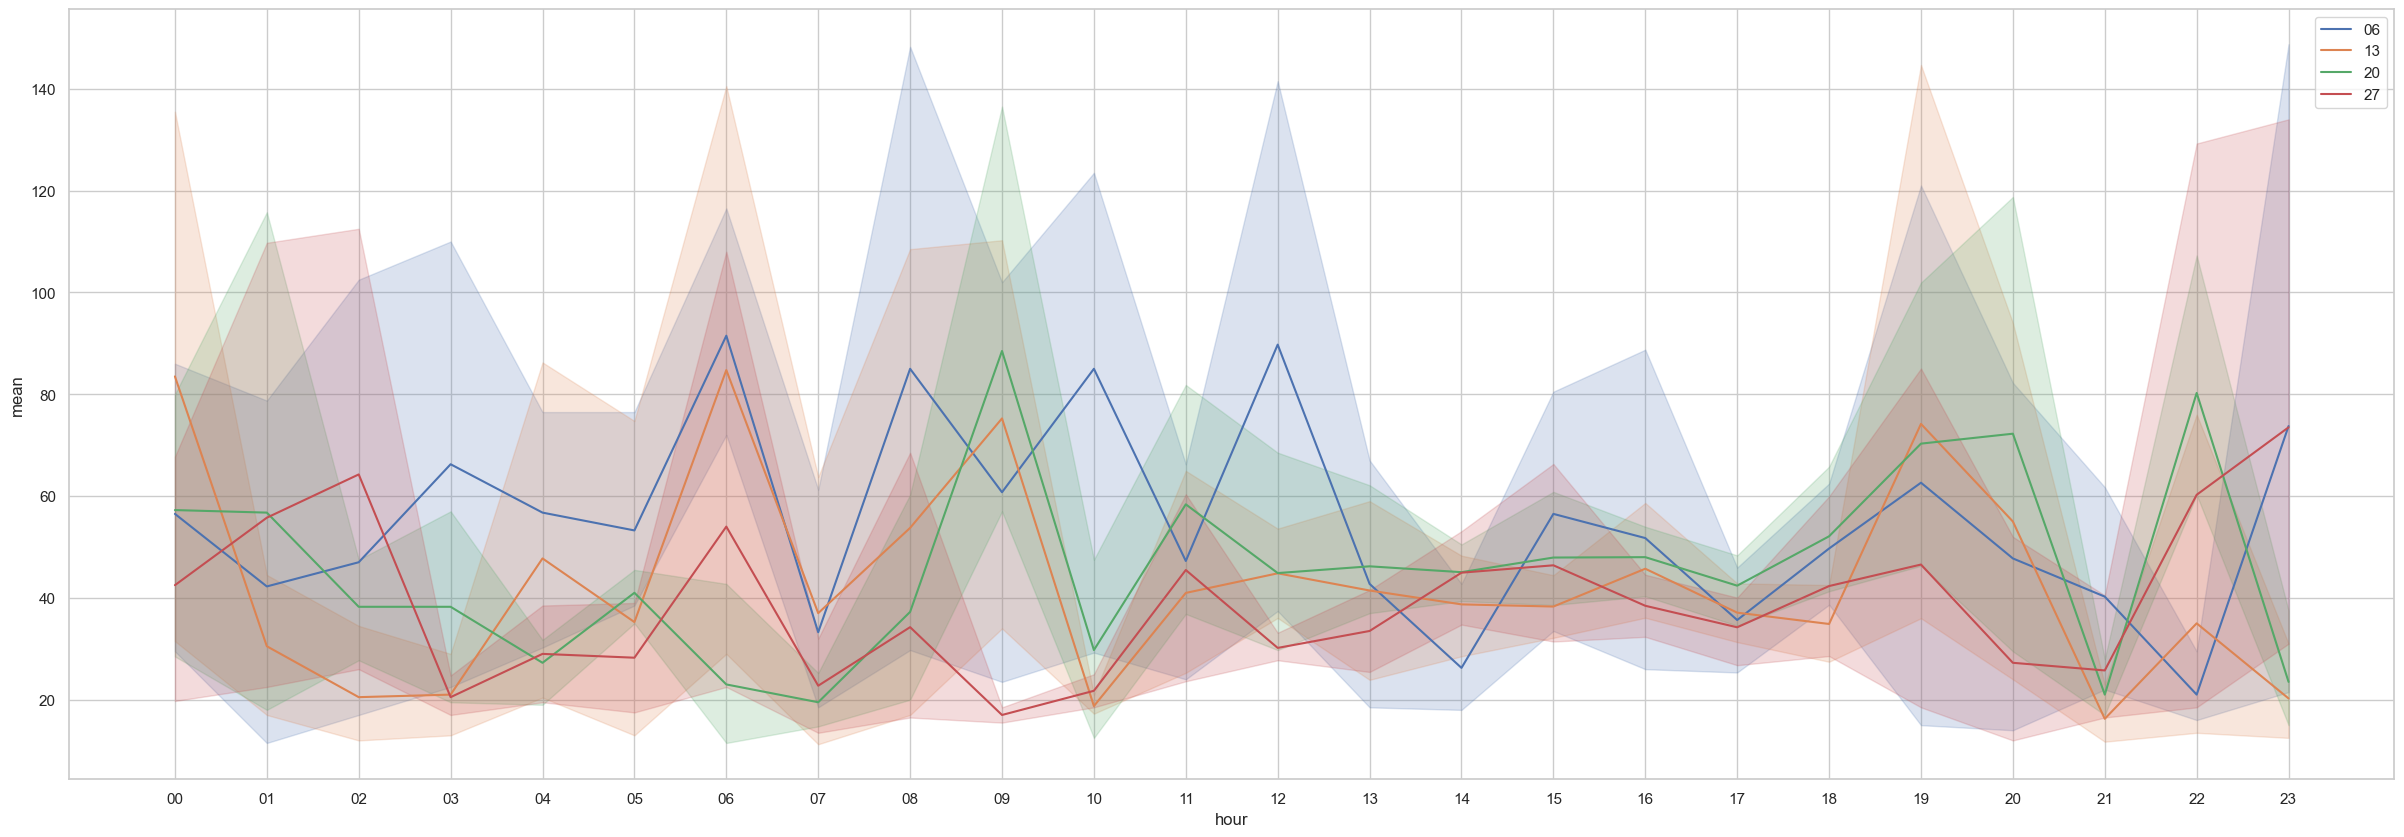

In [266]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,10)) 
sns.lineplot(df_day_m_01, x="hour", y = "mean", label = '06')
sns.lineplot(df_day_m_02, x="hour", y = "mean",  label = '13')
sns.lineplot(df_day_m_03, x="hour", y = "mean",  label = '20')
sns.lineplot(df_day_m_04, x="hour", y = "mean",  label = '27')
plt.show()

In [267]:
df_day_m_01

,timestamp,mean,day,minute,hour,week_day
445,1678075978,65.0,06,12,00,Monday
446,1678076878,102.0,06,27,00,Monday
447,1678077778,38.0,06,42,00,Monday
448,1678078678,21.0,06,57,00,Monday
449,1678079578,11.0,06,12,01,Monday
...,...,...,...,...,...,...
536,1678157878,34.0,06,57,22,Monday
537,1678158778,67.0,06,12,23,Monday
538,1678159678,176.0,06,27,23,Monday
539,1678160578,17.0,06,42,23,Monday


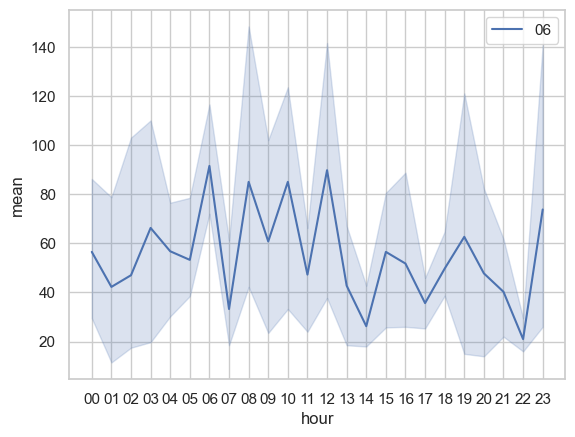

In [273]:
sns.lineplot(df_day_m_01, x="hour", y = "mean", label = '06')
plt.show()